## Попередня обробка  даних і логістична регресія для задачі бінарної класифікації

## Programming assignment

У завданні вам буде запропоновано ознайомитися з основними техніками попередньої оббробки даних, а так само застосувати їх для навчання моделі логістичної регресії. Відповіді буде потрібно завантажити у відповідну форму.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Опис датасета

Завдання: по 38 ознаками, пов'язаних із заявкою на грант (область досліджень вчених, інформація по їх академічному бекграунд, розмір гранту, область, в якій він видається) передбачити, чи буде заявка прийнята. Датасета включає в себе інформацію по 6000 заявками на гранти, які були подані в університеті Мельбурна в період з 2004 по 2008 рік.

Повну версію даних з великою кількістю ознак можна знайти на https://www.kaggle.com/c/unimelb.

In [2]:
data = pd.read_csv('data.csv')
data.shape

(6000, 39)

Виділимо з датасета цільову змінну Grant.Status і позначимо її за y. 

Тепер X позначає навчальну вибірку, y - відповіді на неї

In [3]:
X = data.drop('Grant.Status', 1)
y = data['Grant.Status']

## Теорія по логістичної регресії

Після усвідомлення того, яку саме задачу потрібно вирішити на цих даних, наступним кроком при реальному аналізі був би підбір відповідного методу. В даному завданні вибір методу було проведено за вас, це логістична регресія. Коротко нагадаємо вам використовувану модель.

Логістична регресія передбачає ймовірності приналежності об'єкта до кожного класу. Сума відповідей логістичної регресії на одному об'єкті для всіх класів дорівнює одиниці.

$$ \sum_{k=1}^K \pi_{ik} = 1, \quad \pi_k \equiv P\,(y_i = k \mid x_i, \theta), $$

де:
- $\pi_{ik}$ - ймовірність приналежності об'єкта $x_i$ з вибірки $X$ до класу $k$
- $\theta$ - внутрішні параметри алгоритму, які налаштовуються в процесі навчання, в разі логістичної регресії - $w, b$

З цієї властивості моделі в разі бінарної класифікації потрібно обчислити лише ймовірність приналежності об'єкта до одного з класів (друга обчислюється з умови нормування ймовірностей). Ця ймовірність обчислюється, використовуючи логістичну функцію:

$$ P\,(y_i = 1 \mid x_i, \theta) = \frac{1}{1 + \exp(-w^T x_i-b)} $$

Параметри $w$ і $b$ знаходяться, як вирішення наступного завдання оптимізації (вказані функціонали з L1 і L2 регуляризації, з якими ви познайомилися в попередніх завданнях):

$$ Q(X, y, \theta) = \frac{1}{2} w^T w + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

L1-regularization:

$$ Q(X, y, \theta) = \sum_{d=1}^D |w_d| + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

$C$ - це стандартний гіперпараметр моделі, який регулює те, наскільки сильно ми дозволяємо моделі підлаштовуватися під дані.

## Попередня обробка  даних

З властивостей даної моделі слід, що:
- все $X$ повинні бути числовими даними (в разі наявності серед них категорій, їх потрібно деяким способом перетворити в дійсні числа)
- серед $X$ не повинно бути пропущених значень (тобто всі пропущені значення перед застосуванням моделі слід якимось чином заповнити)

Тому базовим етапом в передобробці будь-якого датасета для логістичної регресії буде кодування категоріальних ознак, а так само видалення або інтерпретація пропущених значень (при наявності того або іншого).

In [4]:
data.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


Видно, що в датасета є як числові, так і категоріальні ознаки. Отримаємо списки їхніх назв:

In [5]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

Також в ньому присутні пропущені значення. Очевидні рішенням буде виключення всіх даних, у яких пропущено хоча б одне значення. Зробимо це:

In [6]:
data.dropna().shape

(213, 39)

Видно, що тоді ми викинемо майже всі дані, і такий метод вирішення в даному випадку не спрацює.

Пропущені значення можна так само інтерпретувати, для цього існує кілька способів, вони розрізняються для категоріальних і дійсних ознак.

Для дійсних ознак:
- замінити на 0 (дана ознака давати внесок в передбачення для даного об'єкта не буде)
- замінити на середнє (кожен пропущений ознака буде давати такий же внесок, як і середнє значення ознаки на датасета)

Для категоріальних:
- інтерпретувати пропущене значення, як ще одну категорію (даний спосіб є самим природним, так як в разі категорій у нас є унікальна можливість не втратити інформацію про наявність пропущених значень; зверніть увагу, що в разі речових ознак дана інформація неминуче втрачається)

## Завдання 0. Обробка пропущених значень.
1. Заповніть пропущені дійсні значення в  X нулями і середніми за стовпцями, назвіть отримані датафрейми X_real_zeros і X_real_mean відповідно. Для підрахунку середніх використовуйте описану нижче процедуру calculate_means, якій  потрібно подати  на вхід дійсні ознаки з вихідного датафрейма. **Для підрахунку середнього можна використовувати функцію pandas.mean ()**
2. Всі категоріальні ознаки в X перетворіть в рядки, пропущені значення потрібно також перетворити в будь-які рядки, які не є категоріями (наприклад, 'NA'), отриманий датафрейм назвіть X_cat.

Для об'єднання вибірок тут і далі в завданні рекомендується використовувати функції

    np.hstack (...)
    np.vstack (...)

In [7]:
def calculate_means(numeric_data):
    means = np.zeros(numeric_data.shape[1])
    for j in range(numeric_data.shape[1]):
        to_sum = numeric_data.iloc[:,j]
        indices = np.nonzero(np.array(~numeric_data.iloc[:,j].isnull()))[0]
        correction = np.amax(to_sum[indices])
        to_sum /= correction
        for i in indices:
            means[j] += to_sum[i]
        means[j] /= indices.size
        means[j] *= correction
    return pd.Series(means, numeric_data.columns)

1.

In [8]:
# place your code here

In [9]:
import math

Заміняємо пропущені дійсні значення нулями.

In [10]:
def change_real_data_zeros(numeric_data):
    for i in range(numeric_data.shape[0]):
        for j in range(numeric_data.shape[1]):
            if (math.isnan(numeric_data.values[i,j])):
                numeric_data.values[i,j] = 0
    return numeric_data

Перевіряємо результат виконання програми.

In [11]:
X_real = X[numeric_cols]
X_real[5995:5999]

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
5995,50.0,30.0,20.0,0.0,0.0,50.0,30.0,20.0,0.0,0.0,1970.0,2.0,0.0
5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975.0,0.0,0.0
5997,40.0,40.0,20.0,0.0,0.0,40.0,40.0,20.0,0.0,0.0,1955.0,3.0,3.0
5998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,0.0,0.0


In [12]:
X_real_zeros = change_real_data_zeros(X_real)
X_real_zeros[5995:5999]

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
5995,50.0,30.0,20.0,0.0,0.0,50.0,30.0,20.0,0.0,0.0,1970.0,2.0,0.0
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1975.0,0.0,0.0
5997,40.0,40.0,20.0,0.0,0.0,40.0,40.0,20.0,0.0,0.0,1955.0,3.0,3.0
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,0.0,0.0


Заміняємо пропущені дійсні значення середніми(по стовпцям) використовуючи функцію ***calculate_means().***

In [13]:
def change_real_data_means(numeric_data):
    mean_data = calculate_means(data[numeric_cols])
    print(mean_data)
    for i in range(numeric_data.shape[0]):
        for j in range(numeric_data.shape[1]):
            if (math.isnan(numeric_data.values[i,j])):
                numeric_data.values[i,j] = mean_data[j]
    return numeric_data

Перевіряємо результат виконання програми. 

In [14]:
X_real = X[numeric_cols]
X_real[5995:5999]

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
5995,50.0,30.0,20.0,0.0,0.0,50.0,30.0,20.0,0.0,0.0,1970.0,2.0,0.0
5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975.0,0.0,0.0
5997,40.0,40.0,20.0,0.0,0.0,40.0,40.0,20.0,0.0,0.0,1955.0,3.0,3.0
5998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,0.0,0.0


In [15]:
X_real_mean = change_real_data_means(X_real)
X_real_mean[5995:5999]

RFCD.Percentage.1                   74.832348
RFCD.Percentage.2                   17.677593
RFCD.Percentage.3                    6.933011
RFCD.Percentage.4                    0.437937
RFCD.Percentage.5                    0.119112
SEO.Percentage.1                    71.483240
SEO.Percentage.2                    20.646880
SEO.Percentage.3                     6.926704
SEO.Percentage.4                     0.730804
SEO.Percentage.5                     0.212192
Year.of.Birth.1                   1962.449849
Number.of.Successful.Grant.1         1.177849
Number.of.Unsuccessful.Grant.1       2.097977
dtype: float64


,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
5995,50.000000,30.000000,20.000000,0.000000,0.000000,50.00000,30.00000,20.000000,0.000000,0.000000,1970.0,2.0,0.0
5996,74.832348,17.677593,6.933011,0.437937,0.119112,71.48324,20.64688,6.926704,0.730804,0.212192,1975.0,0.0,0.0
5997,40.000000,40.000000,20.000000,0.000000,0.000000,40.00000,40.00000,20.000000,0.000000,0.000000,1955.0,3.0,3.0
5998,74.832348,17.677593,6.933011,0.437937,0.119112,71.48324,20.64688,6.926704,0.730804,0.212192,1950.0,0.0,0.0


2.

In [16]:
X_cat = X[categorical_cols]
X_cat.head()

,No..of.Years.in.Uni.at.Time.of.Grant.1,Grant.Category.Code,SEO.Code.5,Role.1,SEO.Code.2,SEO.Code.4,SEO.Code.1,Faculty.No..1,Sponsor.Code,RFCD.Code.1,...,SEO.Code.3,RFCD.Code.5,Country.of.Birth.1,A..1,B.1,Person.ID.1,A.1,With.PHD.1,RFCD.Code.3,Dept.No..1
0,>=0 to 5,50A,0.0,CHIEF_INVESTIGATOR,0.0,0.0,780101.0,31.0,21A,230202.0,...,0.0,0.0,Australia,0.0,2.0,493297.0,4.0,Yes,230204.0,3098.0
1,>=0 to 5,10A,0.0,CHIEF_INVESTIGATOR,0.0,0.0,730112.0,25.0,4D,320801.0,...,0.0,0.0,Australia,0.0,0.0,330592.0,2.0,Yes,0.0,2553.0
2,Less than 0,NaN,0.0,CHIEF_INVESTIGATOR,730105.0,0.0,730203.0,25.0,NaN,320602.0,...,730108.0,0.0,Australia,0.0,2.0,66887.0,7.0,NaN,321015.0,2813.0
3,more than 15,20C,0.0,CHIEF_INVESTIGATOR,671401.0,0.0,730114.0,25.0,51C,291503.0,...,0.0,0.0,Great Britain,5.0,9.0,63812.0,6.0,NaN,0.0,2553.0
4,Less than 0,30B,0.0,CHIEF_INVESTIGATOR,730306.0,0.0,730108.0,25.0,24D,380107.0,...,0.0,0.0,Australia,0.0,0.0,13687.0,0.0,NaN,0.0,2923.0


Дивимося кількість пустих значень по стовпцям.

In [17]:
X_cat.isnull().sum()

No..of.Years.in.Uni.at.Time.of.Grant.1    1050
Grant.Category.Code                        613
SEO.Code.5                                 439
Role.1                                      70
SEO.Code.2                                 439
SEO.Code.4                                 439
SEO.Code.1                                 439
Faculty.No..1                              611
Sponsor.Code                               613
RFCD.Code.1                                417
RFCD.Code.2                                417
C.1                                        366
Home.Language.1                           5444
RFCD.Code.4                                417
Contract.Value.Band...see.note.A          2461
SEO.Code.3                                 439
RFCD.Code.5                                417
Country.of.Birth.1                         904
A..1                                       366
B.1                                        366
Person.ID.1                                366
A.1          

Замінюємо пусті значення на NA та перевіряємо чи змінилися значення.

In [18]:
X_cat.replace(np.nan, 'NA', inplace = True)
X_cat = X_cat.astype(str)
X_cat.head()

,No..of.Years.in.Uni.at.Time.of.Grant.1,Grant.Category.Code,SEO.Code.5,Role.1,SEO.Code.2,SEO.Code.4,SEO.Code.1,Faculty.No..1,Sponsor.Code,RFCD.Code.1,...,SEO.Code.3,RFCD.Code.5,Country.of.Birth.1,A..1,B.1,Person.ID.1,A.1,With.PHD.1,RFCD.Code.3,Dept.No..1
0,>=0 to 5,50A,0.0,CHIEF_INVESTIGATOR,0.0,0.0,780101.0,31.0,21A,230202.0,...,0.0,0.0,Australia,0.0,2.0,493297.0,4.0,Yes,230204.0,3098.0
1,>=0 to 5,10A,0.0,CHIEF_INVESTIGATOR,0.0,0.0,730112.0,25.0,4D,320801.0,...,0.0,0.0,Australia,0.0,0.0,330592.0,2.0,Yes,0.0,2553.0
2,Less than 0,NA,0.0,CHIEF_INVESTIGATOR,730105.0,0.0,730203.0,25.0,NA,320602.0,...,730108.0,0.0,Australia,0.0,2.0,66887.0,7.0,NA,321015.0,2813.0
3,more than 15,20C,0.0,CHIEF_INVESTIGATOR,671401.0,0.0,730114.0,25.0,51C,291503.0,...,0.0,0.0,Great Britain,5.0,9.0,63812.0,6.0,NA,0.0,2553.0
4,Less than 0,30B,0.0,CHIEF_INVESTIGATOR,730306.0,0.0,730108.0,25.0,24D,380107.0,...,0.0,0.0,Australia,0.0,0.0,13687.0,0.0,NA,0.0,2923.0


In [19]:
X_cat.isnull().sum()

No..of.Years.in.Uni.at.Time.of.Grant.1    0
Grant.Category.Code                       0
SEO.Code.5                                0
Role.1                                    0
SEO.Code.2                                0
SEO.Code.4                                0
SEO.Code.1                                0
Faculty.No..1                             0
Sponsor.Code                              0
RFCD.Code.1                               0
RFCD.Code.2                               0
C.1                                       0
Home.Language.1                           0
RFCD.Code.4                               0
Contract.Value.Band...see.note.A          0
SEO.Code.3                                0
RFCD.Code.5                               0
Country.of.Birth.1                        0
A..1                                      0
B.1                                       0
Person.ID.1                               0
A.1                                       0
With.PHD.1                      

## Перетворення категоріальних ознак.

У попередній комірці ми розділили наш датасета ще на дві частини: в одній присутні тільки дійсні ознаки, в іншій тільки категоріальні. Це знадобиться нам для роздільної подальшої обробці цих даних, а так само для порівняння якості роботи тих чи інших методів.

Для використання моделі регресії потрібно  перевести категоріальні ознаки в дійсні. Розглянемо основний спосіб перетворення категоріальних ознак в дійсні: one-hot encoding. Його ідея полягає в тому, що ми перетворимо категоріальний ознака за допомогою бінарного коду: кожної категорії ставимо у відповідність набір з нулів і одиниць.

Подивимося, як цей метод працює на простому наборі даних.

In [20]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV

categorial_data = pd.DataFrame({'sex': ['male', 'female', 'male', 'female'], 
                                'nationality': ['American', 'European', 'Asian', 'European']})
print('Исходные данные:\n')
print(categorial_data)
encoder = DV(sparse = False)
encoded_data = encoder.fit_transform(categorial_data.T.to_dict().values())
print('\nЗакодовані дані:\n')
print(encoded_data)

Исходные данные:

      sex nationality
0    male    American
1  female    European
2    male       Asian
3  female    European

Закодовані дані:

[[1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0.]]


Як видно, в перші три колонки виявилася закодованість інформація про країну, а в другі дві - про поле. При цьому для співпадаючих елементів вибірки рядка будуть повністю співпадати. Також з прикладу видно, що кодування ознак сильно збільшує їх кількість, але повністю зберігає інформацію, в тому числі про наявність пропущених значень (їх наявність просто стає одним з бінарних ознак в перетворених даних).

Тепер застосуємо one-hot encoding до категоріальним ознаками з вихідного датасета. Зверніть увагу на загальний для всіх методів преобработкі даних інтерфейс. функція

    encoder.fit_transform (X)
    
дозволяє обчислити необхідні параметри перетворення, згодом до нових даних можна вже застосовувати функцію

    encoder.transform (X)
    
Дуже важливо застосовувати однакове перетворення як до навчальних, так і тестовим даними, тому що в противному випадку ви отримаєте непередбачувані, і, швидше за все, погані результати. Зокрема, якщо ви окремо закодуєте навчальну та тестову вибірку, то отримаєте взагалі кажучи різні коди для одних і тих же ознак, і ваше рішення працювати не буде.

Також параметри багатьох перетворень (наприклад, розглянуте нижче масштабування) не можна обчислювати одночасно на даних з навчання і тесту, тому що інакше підраховані на тесті метрики якості будуть давати зміщені оцінки на якість роботи алгоритму. Кодування категоріальних ознак не вважає на навчальній вибірці ніяких параметрів, тому його можна застосовувати відразу до всього датасета.

In [21]:
encoder = DV(sparse = False)
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())

Для побудови метрики якості по результату навчання потрібно розділити вихідний датасета на навчальну і тестову вибірки.

Звертаємо увагу на заданий параметр для генератора випадкових чисел: random_state. Так як результати на навчанні і тесті будуть залежати від того, як саме ви розділите об'єкти, то пропонується використовувати заздалегідь певне значення для отримання результатів, погоджених з відповідями в системі перевірки завдань.

In [22]:
from sklearn.model_selection import train_test_split

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0)
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(X_real_mean, 
                                      test_size=0.3, 
                                      random_state=0)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0)

## Опис класів

Отже, ми отримали перші набори даних, для яких виконані обидва обмеження логістичної регресії на вхідні дані. Навчимо на них регресію, використовуючи наявний в бібліотеці sklearn функціонал по підбору гіперпараметров моделі
    
    optimizer = GridSearchCV (estimator, param_grid)

де:
- estimator - навчальний алгоритм, для якого буде проводитися підбір параметрів
- param_grid - словник параметрів, ключами якого є рядки-назви, які передаються алгоритму estimator, а значення - набір параметрів для перебору

Даний клас виконує крос-валідацію навчальної вибірки для кожного набору параметрів і знаходить ті, на яких алгоритм працює найкраще. Цей метод дозволяє налаштовувати гіперпараметри за навчальною вибіркою, уникаючи перенавчання. Деякі опціональні параметри виклику даного класу, які нам знадобляться:
- scoring - функціонал якості, максимум якого шукається крос валідацією, за замовчуванням використовується функція score () класу esimator
- n_jobs - дозволяє прискорити крос-валідацію, виконуючи її паралельно, число визначає кількість одночасно запущених завдань
- cv - кількість фолдов, на які розбивається вибірка при крос-валідації

Після ініціалізації класу GridSearchCV, процес підбору параметрів запускається методом:

    optimizer.fit (X, y)
    
На виході для отримання прогнозів можна користуватися функцією

    optimizer.predict (X)
    
для міток або

    optimizer.predict_proba (X)
    
для ймовірностей (в разі використання логістичної регресії).
    
Також можна безпосередньо отримати оптимальний клас estimator і оптимальні параметри, так як вони є атрибутами класу GridSearchCV:
- best\_estimator\_ - кращий алгоритм
- best\_params\_ - кращий набір параметрів

Клас логістичної регресії виглядає наступним чином:

    estimator = LogisticRegression (penalty)
   
де penalty приймає або значення 'l2', або 'l1'. За замовчуванням встановлюється значення 'l2', і всюди в завданні, якщо про це не обумовлено, передбачається використання логістичної регресії з L2-регуляризації.

## Завдання 1. Порівняння способів заповнення пропущених дійсних значень.
1. Складіть дві навчальні вибірки з дійсних і категоріальних ознак: в одній дійсні ознаки, де пропущені значення заповнені нулями, в іншій - середніми. Рекомендується записувати в вибірки спочатку дійсні , а потім категоріальні ознаки.
2. Навчіть на них логістичну регресію, підбираючи параметри з заданої сітки param_grid за методом крос-валідації з числом фолдов cv = 3. Як оптимізується функції використовуйте задану за замовчуванням.
3. Побудуйте два графіка оцінок точності + - їх стандратним відхиленням в залежності від гіперпараметра і переконайтеся, що ви дійсно знайшли її максимум. Також зверніть увагу на велику дисперсію одержаних оцінок (зменшити її можна збільшенням числа фолдов cv).
4. Отримайте дві метрики якості AUC ROC на тестовій вибірці і порівняйте їх між собою. Який спосіб заповнення пропущених речових значень працює краще? Надалі для виконання завдання в якості дійсних  ознак використовуйте ту вибірку, яка дає кращу якість на тесті.
5. Передайте два значення AUC ROC (спочатку для вибірки, заповненої середніми, потім для вибірки, заповненої нулями) в функцію write_answer_1 і запустіть її. Отриманий файл є відповіддю на 1 завдання.

Інформація для зацікавлених: взагалі кажучи, не цілком логічно оптимізувати на крос-валідації заданий за замовчуванням в класі логістичної регресії функціонал accuracy, а вимірювати на тесті AUC ROC, але це, як і обмеження розміру вибірки, зроблено для прискорення роботи процесу крос-валідації.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer):
    scores=[]
    for i in range(len(optimizer.cv_results_['params'])):
        scores.append([optimizer.cv_results_['params'][i]['C'], 
                optimizer.cv_results_['mean_test_score'][i],
                optimizer.cv_results_['std_test_score'][i]])
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    
def write_answer_1(auc_1, auc_2):
    auc = (auc_1 + auc_2)/2
    with open("preprocessing_lr_answer1.txt", "w") as fout:
        fout.write(str(round(auc,4)))
    print(round(auc,4))
        
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3

# place your code here

#write_answer_1(auc_1, auc_2)

Складаємо навчальні вибірки для значень з нулями та категоріальними ознаками.

In [24]:
X_train_cat_oh = pd.DataFrame(X_train_cat_oh)

X_train_cat_oh.index = X_train_real_zeros.index
X_zeros = pd.concat([X_train_real_zeros, X_train_cat_oh], axis=1)
X_zeros

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,...,5583,5584,5585,5586,5587,5588,5589,5590,5591,5592
4831,30.0,30.0,40.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4646,40.0,30.0,30.0,0.0,0.0,40.0,60.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2154,30.0,40.0,30.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1581,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
135,30.0,35.0,35.0,0.0,0.0,35.0,35.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,100.0,0.0,0.0,0.0,0.0,90.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3264,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1653,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2607,40.0,60.0,0.0,0.0,0.0,80.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Складаємо навчальні вибірки для значень з середніми та категоріальними ознаками.

In [25]:
X_train_cat_oh.index = X_train_real_mean.index
X_mean = pd.concat([X_train_real_mean, X_train_cat_oh], axis=1)
X_mean

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,...,5583,5584,5585,5586,5587,5588,5589,5590,5591,5592
4831,30.0,30.0,40.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4646,40.0,30.0,30.0,0.0,0.0,40.0,60.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2154,30.0,40.0,30.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1581,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
135,30.0,35.0,35.0,0.0,0.0,35.0,35.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,100.0,0.0,0.0,0.0,0.0,90.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3264,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1653,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2607,40.0,60.0,0.0,0.0,0.0,80.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Навчаємо на них логістичну регресію.

for zeros = 0.7476190476190476


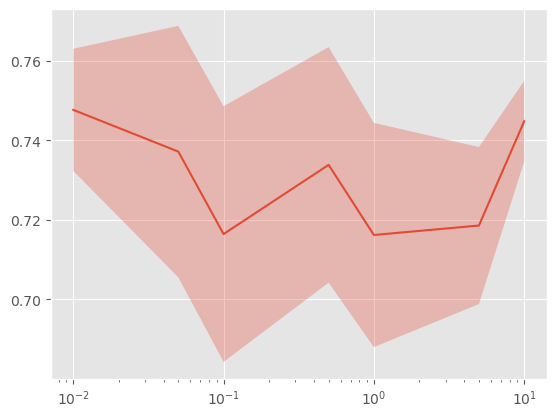

In [26]:
estimator_zero = LogisticRegression()
optimizer_zero = GridSearchCV(estimator_zero, param_grid, cv=cv) # , n_jobs=-1)

optimizer_zero.fit(X_zeros, y_train)
print ("for zeros =", optimizer_zero.best_score_)
plot_scores(optimizer_zero)

for mean = 0.7585714285714286


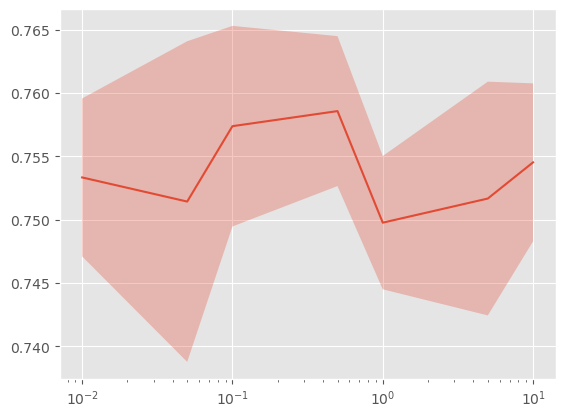

In [27]:
estimator_mean = LogisticRegression()
optimizer_mean = GridSearchCV(estimator_mean, param_grid, cv=cv) # , n_jobs=-1)

optimizer_mean.fit(X_mean, y_train)
print ("for mean =", optimizer_mean.best_score_)
plot_scores(optimizer_mean)

Складаємо тестові вибірки для значень з нулями та категоріальними ознаками.

In [28]:
X_test_cat_oh = pd.DataFrame(X_test_cat_oh)

X_test_cat_oh.index = X_test_real_zeros.index
X_zeros_test = pd.concat([X_test_real_zeros, X_test_cat_oh], axis=1)
#X_zeros_test

Складаємо тестові вибірки для значень з середніми та категоріальними ознаками.

In [29]:
X_test_cat_oh.index = X_test_real_mean.index
X_mean_test = pd.concat([X_test_real_mean, X_test_cat_oh], axis=1)
#X_mean_test

In [30]:
score_zero, score_mean = 0, 0

In [31]:
score_zero = roc_auc_score(y_test, optimizer_zero.predict_proba(X_zeros_test)[:, 1])
score_zero

0.8054750906699367

In [32]:
score_mean = roc_auc_score(y_test, optimizer_zero.predict_proba(X_mean_test)[:, 1])
score_mean

0.8078731573678681

In [33]:
auc_1 = score_mean
auc_2 = score_zero
write_answer_1(auc_1, auc_2)

0.8067


## Масштабування дійсних ознак

Спробуємо якось поліпшити якість класифікації. Для цього подивимося на самі дані:

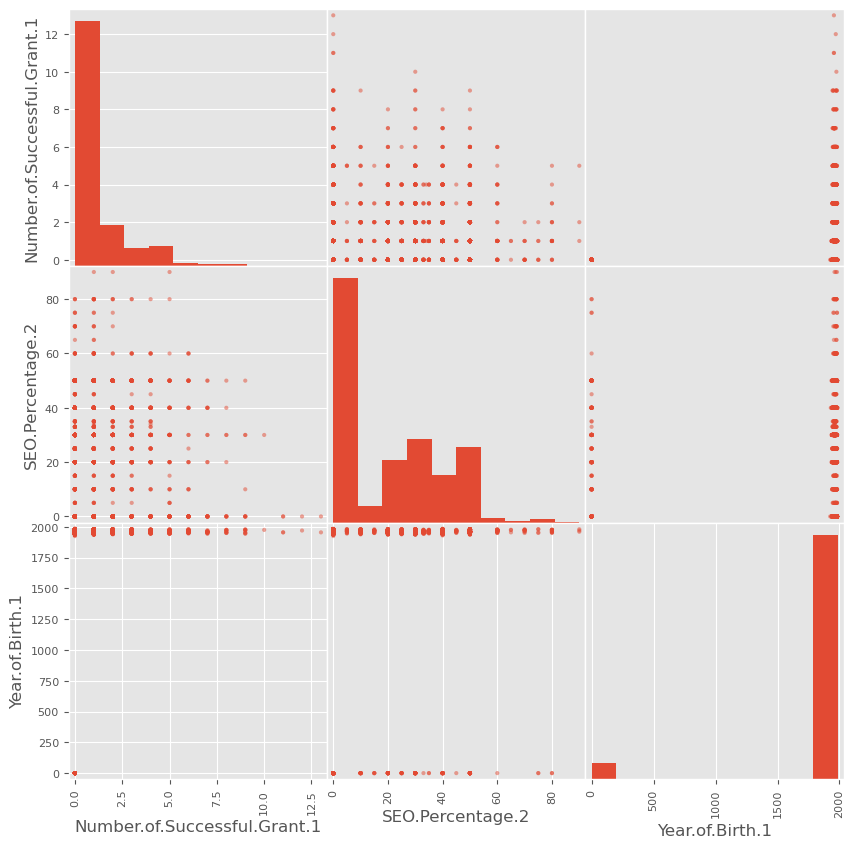

In [34]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_train_real_zeros, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

Як видно з графіків, різні ознаки дуже сильно відрізняються один від одного по модулю значень (зверніть увагу на діапазони значень осей x і y). У випадку звичайної регресії це ніяк не впливає на якість навченою моделі, тому що у менших по модулю ознак будуть великі ваги, але при використанні регуляризації, яка штрафує модель за великі ваги, регресія, як правило, починає працювати гірше.

У таких випадках завжди рекомендується робити стандартизацію (масштабування) ознак, для того щоб вони менше відрізнялися один одного по модулю, але при цьому не порушувалися ніякі інші властивості простору ознак. При цьому навіть якщо підсумкове якість моделі на тесті зменшується, це підвищує її інтерпретабельность, тому що нові ваги мають сенс "значущості" даної ознаки для підсумковій класифікації.

Стандартизація здійснюється за допомогою вирахування з кожної ознаки середнього значення і нормування на вибіркове стандартне відхилення:

$$ x^{scaled}_{id} = \dfrac{x_{id} - \mu_d}{\sigma_d}, \quad \mu_d = \frac{1}{N} \sum_{i=1}^l x_{id}, \quad \sigma_d = \sqrt{\frac{1}{N-1} \sum_{i=1}^l (x_{id} - \mu_d)^2} $$

### Виконайте масштабування дійсних ознак

1. За аналогією з викликом one-hot encoder застосуєте масштабування дійсних ознак для навчальних і тестових вибірок X_train_real_zeros і X_test_real_zeros, використовуючи клас

         StandardScaler
   
    і методи

         StandardScaler.fit_transform (...)
         StandardScaler.transform (...)
2. Збережіть відповідь в змінні X_train_real_scaled і X_test_real_scaled відповідно

In [35]:
from sklearn.preprocessing import StandardScaler

# place your code here
scaler = StandardScaler()
X_train_real_scaled = scaler.fit_transform(X_train_real_zeros)
X_test_real_scaled = scaler.fit_transform(X_test_real_zeros)

## Порівняння ознакових просторів.

Побудуємо такі ж графіки для перетворених даних:

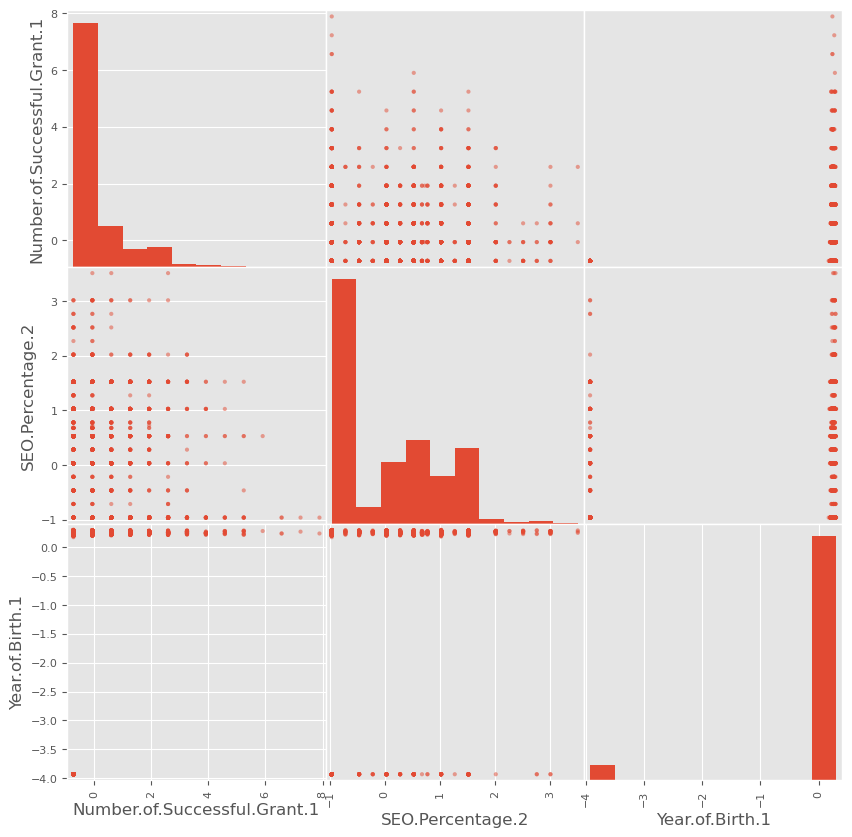

In [36]:
data_numeric_scaled = pd.DataFrame(X_train_real_scaled, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric_scaled[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

Як видно з графіків, ми не поміняли властивості простору ознак: гістограми розподілів значень ознак, як і їх scatter-plots, виглядають так само, як і до нормування, але при цьому всі значення тепер знаходяться приблизно в одному діапазоні, тим самим підвищуючи інтерпретабельность результатів , а також краще поєднуючись з ідеологією регуляризації.

## Завдання 2. Порівняння якості класифікації до і після масштабування дійсних ознак
1. Навчіть ще раз регресію і гіперпараметри на нових ознаках, об'єднавши їх з закодованими категоріальними.
2. Перевірте, чи був знайдений оптимум accuracy по гіперпараметрам під час кроссвалідаціі.
3. Отримайте значення ROC AUC на тестовій вибірці, порівняйте з найкращим результатом, отриманими раніше.
4. Запишіть отриману відповідь в файл за допомогою функції write_answer_2.

In [37]:
def write_answer_2(auc):
    with open("preprocessing_lr_answer2.txt", "w") as fout:
        fout.write(str(round(auc,4)))
    print(round(auc,4))
        
# place your code here

In [38]:
X_train_scaled = np.hstack((X_train_real_scaled, X_train_cat_oh))
X_test_scaled = np.hstack((X_test_real_scaled, X_test_cat_oh))

optimizer_new = 0.7945238095238095


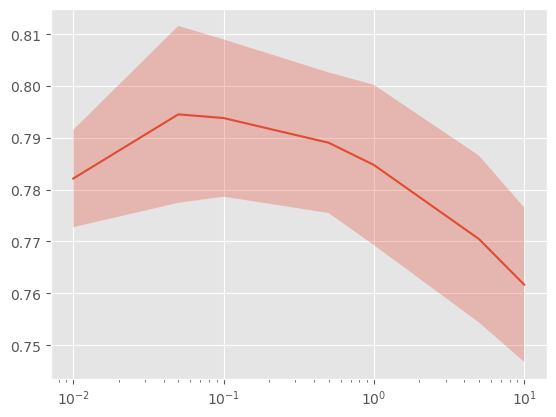

In [39]:
estimator_new = LogisticRegression()
optimizer_new = GridSearchCV(estimator_new, param_grid, cv=cv)

optimizer_new.fit(X_train_scaled, y_train)
print ("optimizer_new =", optimizer_new.best_score_)
plot_scores(optimizer_new)

In [40]:
score_new = roc_auc_score(y_test, optimizer_new.predict_proba(X_test_scaled)[:, 1])
score_new

0.8844343445717445

In [41]:
auc = score_new
write_answer_2(auc)

0.8844


## Балансування класів.

Алгоритми класифікації можуть бути дуже чутливі до незбалансованим класах. Розглянемо приклад з вибірками, семпліровалісь з двох Гауссіан. Їх мат. очікування і матриці коваріації задані так, що справжня розділяє поверхню повинна проходити паралельно осі x. Помістимо в навчальну вибірку 20 об'єктів, семплірованних з 1-й Гауссіана, і 10 об'єктів з 2-й. Після цього навчимо на них лінійну регресію, і побудуємо на графіках об'єкти і області класифікації.

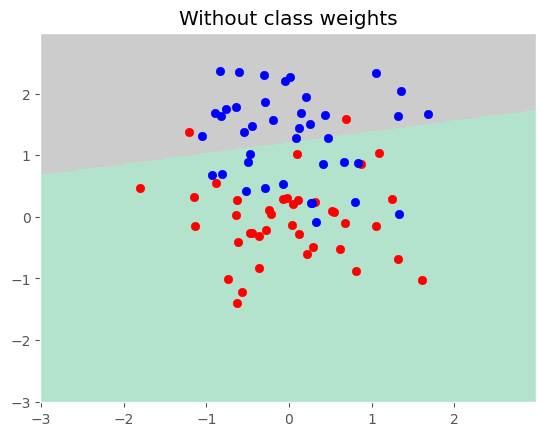

AUC: 0.911667


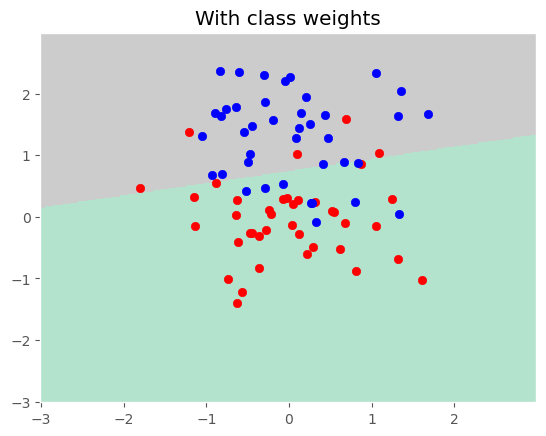

AUC: 0.906667


In [42]:
np.random.seed (0)
"""Семпліруем дані з першої Гауссіана"""
data_0 = np.random.multivariate_normal ([0,0], [[0.5,0], [0,0.5]], size = 40)
"""І з другої"""
data_1 = np.random.multivariate_normal ([0,1], [[0.5,0], [0,0.5]], size = 40)
"""На навчання беремо 20 об'єктів з першого класу і 10 з другого"""
example_data_train = np.vstack ([data_0 [: 20 ,:], data_1 [: 10 ,:]])
example_labels_train = np.concatenate ([np.zeros ((20)), np.ones ((10))])
"""На тест - 20 з першого і 30 з другого"""
example_data_test = np.vstack ([data_0 [20:,:], data_1 [10:,:]])
example_labels_test = np.concatenate ([np.zeros ((20)), np.ones ((30))])
"""Задаємо координатну сітку, на якій будемо обчислювати область класифікації"""
xx, yy = np.meshgrid (np.arange (-3, 3, 0.02), np.arange (-3, 3, 0.02))
"""Навчаємо регресію без балансування за класами"""
optimizer = GridSearchCV (LogisticRegression (), param_grid, cv = cv, n_jobs = -1)
optimizer.fit (example_data_train, example_labels_train)
"""Будуємо прогноз регресії для сітки"""
Z = optimizer.predict (np.c_ [xx.ravel (), yy.ravel ()]).reshape (xx.shape)
plt.pcolormesh (xx, yy, Z, cmap = plt.cm.Pastel2)
plt.scatter (data_0 [:, 0], data_0 [:, 1], color = 'red')
plt.scatter (data_1 [:, 0], data_1 [:, 1], color = 'blue')
"""Обчислюємо AUC"""
auc_wo_class_weights = roc_auc_score (example_labels_test, optimizer.predict_proba (example_data_test) [:, 1])
plt.title ( 'Without class weights')
plt.show ()
print ( 'AUC:% f'% auc_wo_class_weights)
"""Для другої регресії в LogisticRegression передаємо параметр class_weight = 'balanced'"""
optimizer = GridSearchCV (LogisticRegression (class_weight = 'balanced'), param_grid, cv = cv, n_jobs = -1)
optimizer.fit (example_data_train, example_labels_train)
Z = optimizer.predict (np.c_ [xx.ravel (), yy.ravel ()]).reshape (xx.shape)
plt.pcolormesh (xx, yy, Z, cmap = plt.cm.Pastel2)
plt.scatter (data_0 [:, 0], data_0 [:, 1], color = 'red')
plt.scatter (data_1 [:, 0], data_1 [:, 1], color = 'blue')
auc_w_class_weights = roc_auc_score (example_labels_test, optimizer.predict_proba (example_data_test) [:, 1])
plt.title ( 'With class weights')
plt.show ()
print ( 'AUC:% f'% auc_w_class_weights)

Як бачимо, у другому випадку класифікатор знаходить розділяє поверхню, яка ближче до істинної, тобто менше перенавчати. Тому на збалансованість класів в навчальній вибірці завжди слід звертати увагу.

Подивимося, збалансовані чи класи в нашій навчальній вибірці:

In [43]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

2316
1884


Видно, що немає.

Виправити ситуацію можна різними способами, ми розглянемо два:
- давати об'єктам міноритарного класу більшу вагу при навчанні класифікатора (розглянуто в прикладі вище)
- досемпліровать об'єкти міноритарного класу, поки число об'єктів в обох класах не зрівняється

## Завдання 3. Балансування класів.
1. Навчіть логістичну регресію і гіперпараметри з балансуванням класів, використовуючи ваги (параметр class_weight = 'balanced' регресії) на отмасштабовані вибірках, отриманих в попередньому завданні. Переконайтеся, що ви знайшли максимум accuracy по гіперпараметрам.
2. Отримайте метрику ROC AUC на тестовій вибірці.
3. Збалансуйте вибірку, досемпліровав в неї об'єкти з меншого класу. Для отримання індексів об'єктів, які потрібно додати в навчальну вибірку, використовуйте наступну комбінацію викликів функцій:
        np.random.seed (0)
        indices_to_add = np.random.randint (...)
        X_train_to_add = X_train [y_train == 1,:] [indices_to_add ,:]
   Після цього додайте ці об'єкти в початок або кінець навчальної вибірки. Доповніть відповідним чином вектор відповідей.
4. Отримайте метрику ROC AUC на тестовій вибірці, порівняйте з попереднім результатом.
5. Внесіть відповіді в вихідний файл за допомогою функції write_asnwer_3, передавши в неї спочатку ROC AUC для балансування вагами, а потім балансування вибірки вручну.

In [44]:
def write_answer_3(auc_1, auc_2):
    auc = (auc_1 + auc_2) / 2
    with open("preprocessing_lr_answer3.txt", "w") as fout:
        fout.write(str(round(auc,4)))
    print(round(auc,4))        

        # place your code here

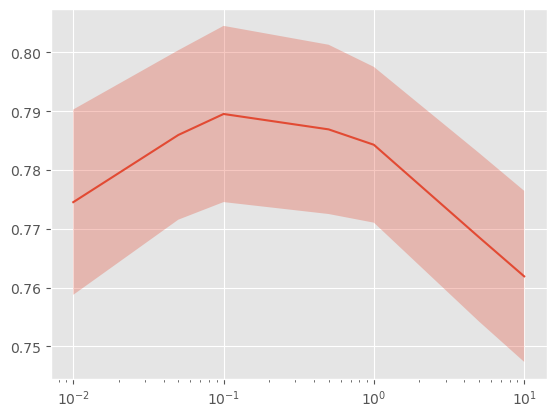

AUC with class weights: 0.886751


In [45]:
estimator_31 = LogisticRegression(class_weight = 'balanced')
optimizer_31 = GridSearchCV(estimator_31, param_grid, cv=cv)

optimizer_31.fit(X_train_scaled, y_train)
plot_scores(optimizer_31)

score_31 = roc_auc_score(y_test, optimizer_31.predict_proba(X_test_scaled)[:, 1])
print ('AUC with class weights:% f'% score_31)

In [46]:
np.random.seed (0)
size_y0 = np.sum(y_train==0)
size_y1 = np.sum(y_train==1)
indices_to_add = np.random.randint (0, size_y1, size = (size_y0 - size_y1))
X_train_to_add = X_train_scaled [y_train == 1,:] [indices_to_add ,:]

In [47]:
X_train = np.vstack((X_train_scaled, X_train_to_add))
y_train_to_add = np.array([1]*(size_y0 - size_y1))

y_train_1 = np.array(y_train)
y_train_to_add_1 = np.array(y_train_to_add)

y_train_new = np.vstack((y_train_1.reshape(len(y_train), 1), y_train_to_add_1.reshape(len(y_train_to_add), 1)))

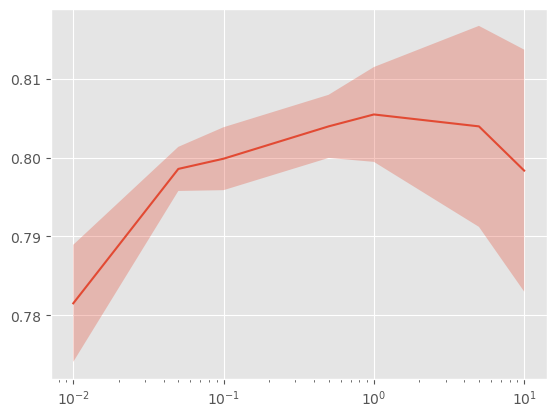

AUC without class weights: 0.883345


In [48]:
estimator_32 = LogisticRegression()
optimizer_32 = GridSearchCV(estimator_32, param_grid, cv=cv)

optimizer_32.fit(X_train, y_train_new[:, 0])
plot_scores(optimizer_32)

score_32 = roc_auc_score(y_test, optimizer_32.predict_proba(X_test_scaled)[:, 1])
print ('AUC without class weights:% f'% score_32)

In [49]:
auc_1 = score_31
auc_2 = score_32
write_answer_3(auc_1, auc_2)

0.885


## Стратифікація вибірок.

Розглянемо ще раз приклад з вибірками з нормальних розподілів. Подивимося ще раз на якість класифікаторів, що отримується на тестових вибірках:

In [50]:
print('AUC ROC for classifier without weighted classes', auc_wo_class_weights)
print('AUC ROC for classifier with weighted classes: ', auc_w_class_weights)

AUC ROC for classifier without weighted classes 0.9116666666666666
AUC ROC for classifier with weighted classes:  0.9066666666666666


Насколько эти цифры реально отражают качество работы алгоритма, если учесть, что тестовая выборка так же несбалансирована, как обучающая? При этом мы уже знаем, что алгоритм логистический регрессии чувствителен к балансировке классов в обучающей выборке, т.е. в данном случае на тесте он будет давать заведомо заниженные результаты. Метрика классификатора на тесте имела бы гораздо больший смысл, если бы объекты были разделы в выборках поровну: по 20 из каждого класса на обучени и на тесте. Переформируем выборки и подсчитаем новые ошибки:

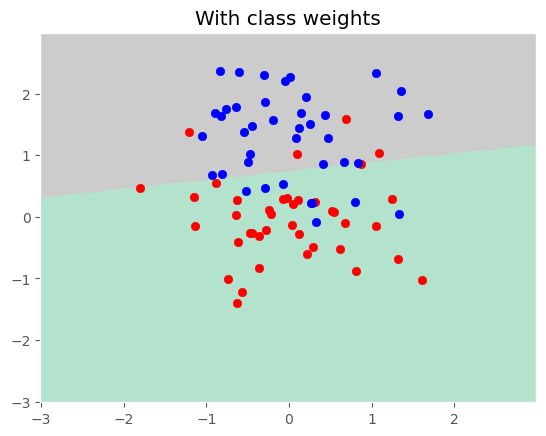

AUC ROC for stratified samples:  0.9125


In [51]:
"""Розділимо дані по класах порівну між навчальною і тестової вибірками"""
example_data_train = np.vstack([data_0[:20,:], data_1[:20,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((20))])
example_data_test = np.vstack([data_0[20:,:], data_1[20:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((20))])
"""Навчимо класифікатор"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_stratified = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('With class weights')
plt.show()
print('AUC ROC for stratified samples: ', auc_stratified)

Як бачимо, після даної процедури відповідь класифікатора змінився незначно, а ось якість збільшилася. При цьому, в залежності від того, як ви розбили спочатку дані на навчання і тест, після збалансованого розподілу вибірок підсумкова метрика на тесті може як збільшитися, так і зменшитися, але довіряти їй можна значно більше, тому що вона побудована з урахуванням специфіки роботи класифікатора. Даний підхід є окремим випадком т.зв. методу стратифікації.

## Завдання 4. Стратифікація вибірки.

1. За аналогією з тим, як це було зроблено на початку завдання, розбийте вибірки X_real_zeros і X_cat_oh на навчання і тест, передаючи в функцію
        train_test_split (...)
   додатково параметр
       stratify = y
   Також обов'язково передайте в функцію змінну random_state = 0.
2. Виконайте масштабування нових речових вибірок, навчіть класифікатор і його гіперпараметри за допомогою методу крос-валідації, роблячи поправку на незбалансовані класи за допомогою ваг. Переконайтеся в тому, що знайшли оптимум accuracy по гіперпараметрам.
3. Оцініть якість класифікатора метриці AUC ROC на тестовій вибірці.
4. Отримана відповідь передайте функції write_answer_4

In [52]:
def write_answer_4(auc):
    with open("preprocessing_lr_answer4.txt", "w") as fout:
        fout.write(str(round(auc,4)))
    print(round(auc,4))        
        
# place your code here

In [53]:
(X_train_real_zeros, X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, test_size=0.3, random_state=0, stratify=y)

(X_train_cat_oh, X_test_cat_oh) = train_test_split(X_cat_oh, test_size=0.3, random_state=0, stratify=y)

In [54]:
scaler = StandardScaler()
X_train_real_scaled = scaler.fit_transform(X_train_real_zeros)
X_test_real_scaled  = scaler.transform(X_test_real_zeros)

X_train_scaled = np.hstack((X_train_real_scaled, X_train_cat_oh))
X_test_scaled  = np.hstack((X_test_real_scaled, X_test_cat_oh))

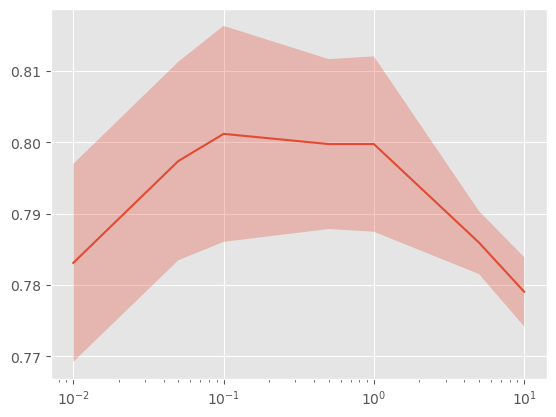

0.8794


In [55]:
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv)
optimizer.fit(X_train_scaled, y_train)
plot_scores(optimizer)

auc4 = roc_auc_score(np.array(y_test), optimizer.predict_proba(X_test_scaled)[:, 1])
write_answer_4(auc4)

Тепер ви розібралися з основними етапами предобработки даних для лінійних класифікаторів.
Нагадаємо основні етапи:
- обробка пропущених значень
- обробка категоріальних ознак
- стратифікація
- балансування класів
- масштабування

Дані дії з даними рекомендується проводити всякий раз, коли ви плануєте використовувати лінійні методи. Рекомендація щодо виконання багатьох з цих пунктів справедлива і для інших методів машинного навчання.

## Трансформація ознак.

Тепер розглянемо способи перетворення ознак. Існує досить багато різних способів трансформації ознак, які дозволяють за допомогою лінійних методів отримувати більш складні розділяють поверхні. Самим базовим є поліноміальний перетворення ознак. Його ідея полягає в тому, що крім самих ознак ви додатково включаєте набір все поліноми ступеня $ p $, які можна з них побудувати. Для випадку $ p = 2 $ перетворення виглядає наступним чином:

$$ \phi(x_i) = [x_{i,1}^2, ..., x_{i,D}^2, x_{i,1}x_{i,2}, ..., x_{i,D} x_{i,D-1}, x_{i,1}, ..., x_{i,D}, 1] $$

Розглянемо принцип роботи цих ознак на даних, семплірованних їх Гауссіан:

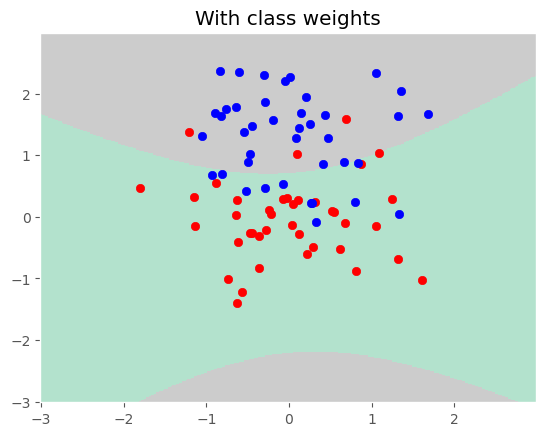

In [56]:
from sklearn.preprocessing import PolynomialFeatures

"""Ініціалізуємо клас, який може конвертувати"""
transform = PolynomialFeatures(2)
"""Навчаємо перетворення на навчальній вибірці, застосовуємо його до тестової"""
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
"""Звертаємо увагу на параметр fit_intercept = False"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('With class weights')
plt.show()

Видно, що даний метод перетворення даних вже дозволяє будувати нелінійні розділяють поверхні, які можуть більш тонко підлаштовуватися під дані і знаходити більш складні залежності. Число ознак в новій моделі:

In [57]:
print(example_data_train_poly.shape)

(40, 6)


Але при цьому одночасно даний метод сприяє більш сильною здатності моделі до перенавчання через швидке зростання числа ознакою зі збільшенням ступеня $p$. Розглянемо приклад з $p = 11$:

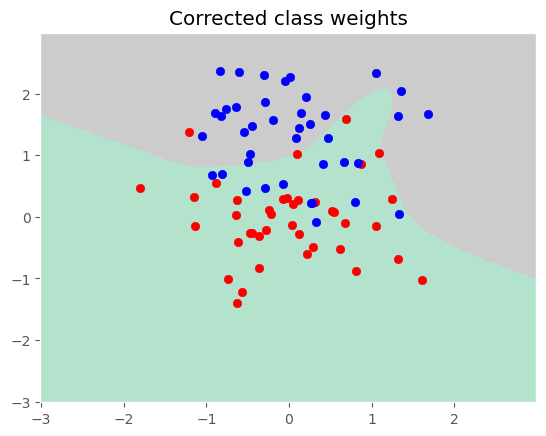

In [58]:
transform = PolynomialFeatures(11)
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('Corrected class weights')
plt.show()

Кількість ознак в даній моделі:

In [59]:
print(example_data_train_poly.shape)

(40, 78)


## Завдання 5. Трансформація дійсних ознак.

1. Реалізуйте за аналогією з прикладом перетворення речових ознак моделі за допомогою поліноміальних ознак ступеня 2
2. Побудуйте логістичну регресію на нових даних, одночасно підібравши оптимальні гіперпараметри. Звертаємо увагу, що в перетворених ознаках вже присутній стовпець, все значення якого дорівнюють 1, тому навчати додатково значення $ b $ не потрібно, його функцію виконує один з терезів $ w $. У зв'язку з цим, щоб уникнути лінійної залежності в датасета, в виклик класу логістичної регресії потрібно передавати параметр fit_intercept = False. Для навчання використовуйте стратифіковані вибірки з балансуванням класів за допомогою ваг, перетворені ознаки потрібно заново отмасштабовані.
3. Отримайте AUC ROC на тесті і порівняйте даний результат з використанням звичайних ознак.
4. Передайте отриману відповідь в функцію write_answer_5.

In [60]:
def write_answer_5(auc):
    with open("preprocessing_lr_answer5.txt", "w") as fout:
        fout.write(str(round(auc,4)))
    print(round(auc,4))        
        
# place your code here

In [61]:
transform = PolynomialFeatures(2)
X_train_real_poly = transform.fit_transform(X_train_real_zeros)
X_test_real_poly  = transform.transform(X_test_real_zeros)

scaler = StandardScaler()
X_train_real_scaled = scaler.fit_transform(X_train_real_poly)
X_test_real_scaled  = scaler.transform(X_test_real_poly)

In [62]:
X_train_poly = np.hstack((X_train_real_scaled, X_train_cat_oh))
X_test_poly = np.hstack((X_test_real_scaled, X_test_cat_oh))

In [63]:
estimator =  LogisticRegression(class_weight='balanced', fit_intercept=False)
optimizer = GridSearchCV(estimator, param_grid, cv=cv, n_jobs=-1)
optimizer.fit(X_train_poly, y_train)

auc5 = roc_auc_score(y_test, optimizer.predict_proba(X_test_poly)[:, 1])
write_answer_5(auc5)

0.887


## Регресія Lasso.
До логістичної регресії також можна застосувати L1-регуляризацію (Lasso), замість регуляризації L2, яка буде приводити до відбору ознак. Вам пропонується застосувати L1-регуляцію до вихідних ознаками і проінтерпретувати отримані результати (застосування відбору ознак до поліноміальних так само можна успішно застосовувати, але в ньому вже буде відсутній компонента інтерпретації, тому що смислове значення оригінальних ознак відомо, а поліноміальних - вже може бути досить нетривіально). Для виклику логістичної регресії з L1-регуляризації досить передати параметр penalty = 'l1' в ініціалізацію класу.

## Завдання 6. Відбір ознак за допомогою регресії Lasso.
1. Навчіть регресію Lasso на стратифікована отмасштабовані вибірках, використовуючи балансування класів за допомогою ваг. Для завдання використовуємо X_train_real_zeros.
2. Отримайте ROC AUC регресії, порівняйте його з попередніми результатами.
3. Знайдіть номери речових ознак, які мають нульові ваги в підсумковій моделі.
4. Передайте їх список функції write_answer_6.

In [64]:
def write_answer_6(features):
    answers = [num for num in features]
    with open("preprocessing_lr_answer6.txt", "w") as fout:
        fout.writelines(" ".join([str(num) for num in answers])+'\n')
        fout.writelines('сума трьох перших чисел: '+ str(round(sum(answers[:3]),4)))
        print(answers)
        print('сума трьох перших чисел: '+ str(round(sum(answers[:3]),4)))

        
# place your code here


#write_answer_6(features)

In [65]:
#optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', penalty = 'L1'), param_grid, cv=cv)
#optimizer.fit(X_train_scaled, y_train)

#ValueError:  Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got L1.

In [66]:
#pen=['l1', 'l2', 'elasticnet', 'none']
#optimizer = GridSearchCV(LogisticRegression(penalty = pen[0],class_weight='balanced'), param_grid, cv=cv)
#optimizer.fit(X_train_scaled, y_train)

#ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [67]:
optimizer = GridSearchCV(LogisticRegression(penalty = 'l2',class_weight='balanced'), param_grid, cv=cv)
optimizer.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})

In [68]:
auc6 = roc_auc_score(y_test, optimizer.predict(X_test_scaled))
auc6

0.7885973161375068

In [69]:
print('auc5 =', auc5)
print('auc6 =', auc6)

auc5 = 0.8869888147517899
auc6 = 0.7885973161375068


In [70]:
estimator = optimizer.best_estimator_
estimator.coef_

array([[ 0.01735661,  0.03160212, -0.03719963, ...,  1.11284096,
        -0.10320508,  0.10266482]])

In [71]:
features = [] # відповідь на 5 завдання
e1 = estimator.coef_
for ii in range(e1.shape[1]):
    #print(e1[0,ii])
    if(e1[0,ii] == 0):
        features.append(ii)


In [72]:
write_answer_6(features[:3])

[43, 44, 63]
сума трьох перших чисел: 150
